Building a machine learning model (specifically a Multi-Layer Perceptron) to recognize and classify the letters

In [ ]:
# 1. Read the dataset into a dataframe
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/A_Z Handwritten Data.csv')

In [ ]:
# 2. Explore the dataset and determine what is the target variable.
print(df.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      0    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      0    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


Target variable seems to be lable.

In [ ]:
# 3. Separate the dataframe into feature set and target variable.
X = df.drop(columns=['label'])  # features
y = df['label']  # target variable ('label')

In [ ]:
# 4. Print the shape of feature set and target variable.
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (372451, 784)
y shape: (372451,)


5. The target variable values are numbers.

In [ ]:
# 6. Mapping numbers to letters.
word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G',
            7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M',
            13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S',
            19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

y_letters = y.map(word_dict)
print(y_letters.head())

0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object


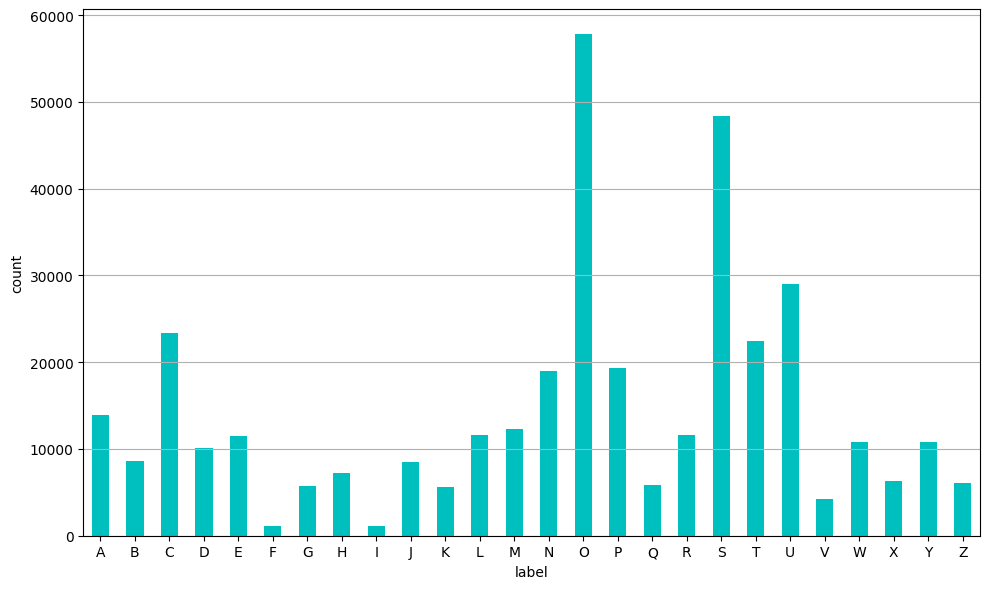

In [ ]:
# 7. Show a histogram (count) of the letters.
import matplotlib.pyplot as plt

letter_counts = y_letters.value_counts().sort_index()

plt.figure(figsize=(10,6))
letter_counts.plot(kind='bar', color='c')
plt.xlabel('label')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

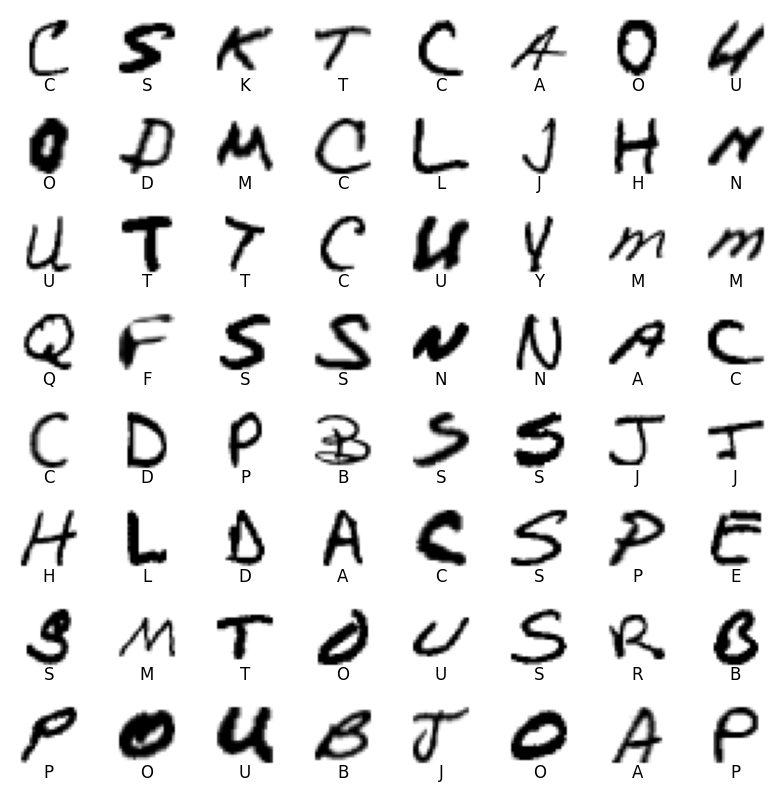

In [ ]:
# 8. Display 64 random letters from the dataset.
import numpy as np

random_indices = np.random.choice(len(X), 64, replace=False)
sample_images = X.iloc[random_indices].values.reshape(-1, 28, 28)
sample_labels_letters = y_letters.iloc[random_indices].values

plt.figure(figsize=(8, 8))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(sample_images[i], cmap='gray_r')
    plt.title(sample_labels_letters[i], y=-0.15)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 9. Partition the data into train and test sets (70/30). Use random_state = 2023. Stratify it.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023, stratify=y)

In [ ]:
# 10. Scale the train and test features.
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [ ]:
# 11. Create an MLPClassifier. Experiment with various parameters. random_state = 2023.
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu',
                 max_iter = 50, alpha = 0.001, solver='adam',
                      random_state = 2023, learning_rate_init=0.01, verbose=True)

In [ ]:
# 12. Fit to train the model.
model.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.33689284
Iteration 2, loss = 0.22024646
Iteration 3, loss = 0.20907477
Iteration 4, loss = 0.19932950
Iteration 5, loss = 0.19784161
Iteration 6, loss = 0.19671046
Iteration 7, loss = 0.18697664
Iteration 8, loss = 0.18544245
Iteration 9, loss = 0.18603022
Iteration 10, loss = 0.18230793
Iteration 11, loss = 0.18321388
Iteration 12, loss = 0.18329924
Iteration 13, loss = 0.17839613
Iteration 14, loss = 0.18261623
Iteration 15, loss = 0.18132320
Iteration 16, loss = 0.17825175
Iteration 17, loss = 0.17531646
Iteration 18, loss = 0.17549907
Iteration 19, loss = 0.17604434
Iteration 20, loss = 0.17491433
Iteration 21, loss = 0.17388077
Iteration 22, loss = 0.17514074
Iteration 23, loss = 0.17282106
Iteration 24, loss = 0.17358619
Iteration 25, loss = 0.17349464
Iteration 26, loss = 0.17091888
Iteration 27, loss = 0.17193214
Iteration 28, loss = 0.17060511
Iteration 29, loss = 0.17258069
Iteration 30, loss = 0.16955206
Iteration 31, loss = 0.17240923
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=50, random_state=2023,
              verbose=True)

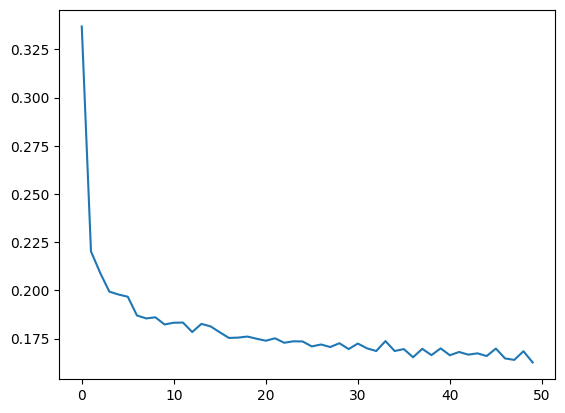

In [ ]:
# 13. Plot the loss curve.
plt.plot(model.loss_curve_)

In [ ]:
# 14. Display the accuracy of your model.
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.81%


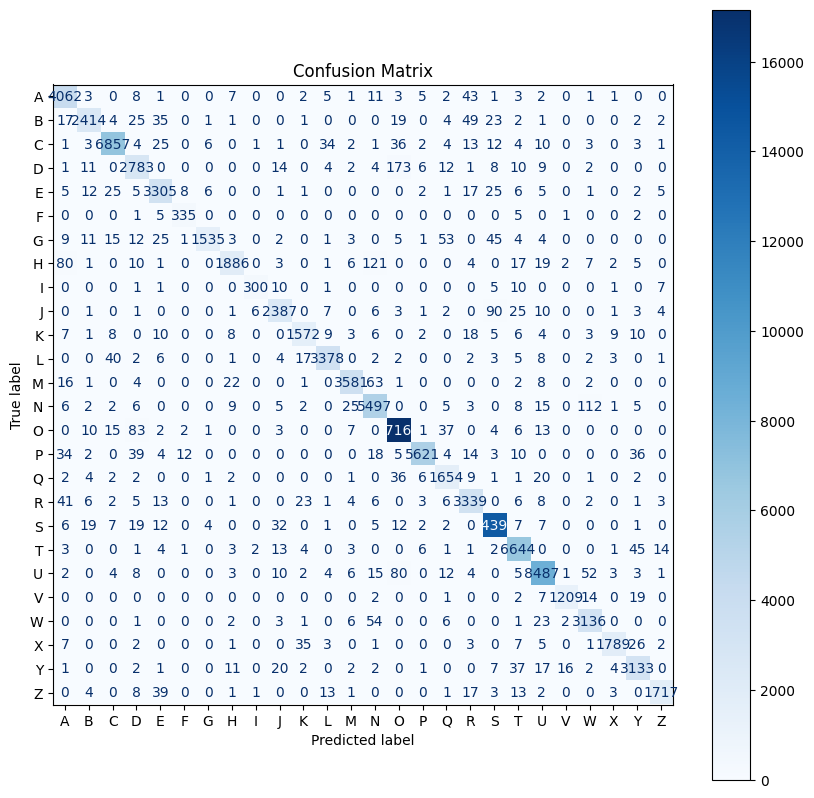

In [ ]:
# 15. Plot the confusion matrix along with the letters.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(word_dict.values()))
disp = disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


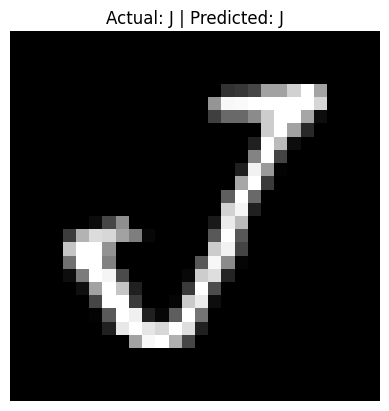

In [ ]:
# 16. Now, display the predicted letter of the first row in the test dataset.
# Also display the actual letter. Show both actual and predicted letters (as title) on the image of the letter.
predicted_value = model.predict(X_test_scaled.iloc[0].values.reshape(1, -1))
predicted_letter = word_dict[int(predicted_value[0])]

actual_letter = word_dict[int(y_test.iloc[0])]

image_data = X_test_scaled.iloc[0].values.reshape(28, 28)

plt.imshow(image_data, cmap='gray')
plt.title(f"The predicted letter is {predicted_letter} and the actual letter is {actual_letter}")
plt.axis('off')
plt.show()

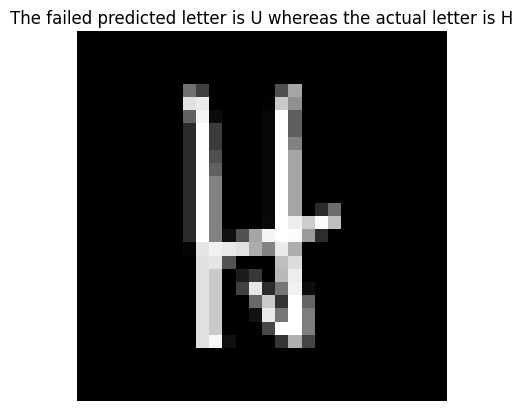

In [ ]:
# 17. Finally, display the actual and predicted letter of a misclassified letter.
predicted_values = model.predict(X_test_scaled)
misclassified_index = np.where(y_test != predicted_values)[0][0]

image_data = X_test.iloc[misclassified_index].values.reshape(28, 28)

actual_letter = word_dict[int(y_test.iloc[misclassified_index])]
predicted_letter = word_dict[int(predicted_values[misclassified_index])]

plt.imshow(image_data, cmap='gray')
plt.title(f"The failed predicted letter is {predicted_letter} whereas the actual letter is {actual_letter}")
plt.axis('off')
plt.show()